In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
teams_to_systems = json.load(open('team-to-submissions.json'))
datasets = {
    # dataset_name: (category, prefix, suffix)
    'pan24-generative-authorship-test-20240502-test': ('main', '', ''),
    'pan24-generative-authorship-test-b-20240506-test': ('cross-domain', '', '-cross-domain'),
    'pan24-generative-authorship-news-test-c-20240506-test': ('unicode-full', '', '-unicode-full'),
    'pan24-generative-authorship-news-test-d-20240506-test': ('unicode-half', '', '-unicode-half'),
    'pan24-generative-authorship-news-test-e-20240506-test': ('german', '', '-german'),
    'pan24-generative-authorship-news-test-f-20240514-test': ('paraphrase', '', '-paraphrase'),
    'pan24-generative-authorship-news-test-g-20240516-test': ('contrastive', '', ''),              # suffix already part of the name
    'pan24-generative-authorship-news-test-h-20240521-test': ('short', '', '-short'),
    'pan24-generative-authorship-eloquent-20240523-test': ('eloquent', 'eloquent-', ''),
}

df = []
evaluation_scores = json.load(open('evaluation-scores.json', 'r'))
for team, systems in teams_to_systems.items():
    for s in systems:
        row_base = {'system': ':'.join((team, s)) if team != 'baseline' else s}
        for d, (dname, pre, suff) in datasets.items():
            df.extend(
                {
                    **row_base,
                    'dataset': ''.join((pre, src, suff)),
                    'category': dname,
                    **evaluation_scores[team][s][d]['_sources'][src]
                } for src in evaluation_scores[team].get(s, {}).get(d, {}).get('_sources', [])
                    if not (src.endswith('german') and dname == 'main')   # German was mixed into main dataset
            )

df = pd.DataFrame(df)
df.set_index(['system', 'dataset', 'category'], inplace=True)
df

roc-auc  \
system                       dataset                     category            
cnlp-nits-pp:direct-velocity alpaca-7b                   main        0.996   
                             bigscience-bloomz-7b1       main        0.988   
                             gemini-pro                  main        0.998   
                             gemini-pro-high-temperature main        0.999   
                             gpt-3.5-turbo-0125          main        0.999   
...                                                                    ...   
logistic-fsu                 eloquent-chatgpt35          eloquent    0.993   
                             eloquent-gptsw3             eloquent    0.879   
                             eloquent-reindeer-mistral   eloquent    1.000   
                             eloquent-reindeer-poro      eloquent    1.000   
                             eloquent-verbanex-ai        eloquent    1.000   

                                                                   brier  \
system                       dataset                     category          
cnlp-nits-pp:direct-velocity alpaca-7b                   main      0.866   
                             bigscience-bloomz-7b1       main      0.865   
                             gemini-pro                  main      0.881   
                             gemini-pro-high-temperature main      0.883   
                             gpt-3.5-turbo-0125          main      0.878   
...                                                                  ...   
logistic-fsu                 eloquent-chatgpt35          eloquent  0.885   
                             eloquent-gptsw3             eloquent  0.821   
                             eloquent-reindeer-mistral   eloquent  0.862   
                             eloquent-reindeer-poro      eloquent  0.881   
                             eloquent-verbanex-ai        eloquent  0.879   

                                                                     c@1  \
system                       dataset                     category          
cnlp-nits-pp:direct-velocity alpaca-7b                   main      0.986   
                             bigscience-bloomz-7b1       main      0.980   
                             gemini-pro                  main      0.996   
                             gemini-pro-high-temperature main      0.997   
                             gpt-3.5-turbo-0125          main      0.997   
...                                                                  ...   
logistic-fsu                 eloquent-chatgpt35          eloquent  0.958   
                             eloquent-gptsw3             eloquent  0.875   
                             eloquent-reindeer-mistral   eloquent  0.958   
                             eloquent-reindeer-poro      eloquent  1.000   
                             eloquent-verbanex-ai        eloquent  1.000   

                                                                      f1  \
system                       dataset                     category          
cnlp-nits-pp:direct-velocity alpaca-7b                   main      0.954   
                             bigscience-bloomz-7b1       main      0.934   
                             gemini-pro                  main      0.963   
                             gemini-pro-high-temperature main      0.976   
                             gpt-3.5-turbo-0125          main      0.969   
...                                                                  ...   
logistic-fsu                 eloquent-chatgpt35          eloquent  0.952   
                             eloquent-gptsw3             eloquent  0.889   
                             eloquent-reindeer-mistral   eloquent  0.963   
                             eloquent-reindeer-poro      eloquent  1.000   
                             eloquent-verbanex-ai        eloquent  1.000   

                                                                    f05u  \
system   

### System Mean Performance Per Dataset

In [3]:
df_team_ds_mean = df.groupby(['dataset', 'category', 'system']).mean().sort_values(['dataset', 'mean'], ascending=False)
df_team_ds_mean

roc-auc  \
dataset                              category system                                                    
vicgalle-gpt2-open-instruct-v1-short short    marsan:staff-trunk                                1.000   
                                              cnlp-nits-pp:direct-velocity                      1.000   
                                              you-shun-you-de:charitable-mole_v3                0.926   
                                              you-shun-you-de:plain-fortress                    0.926   
                                              g-fosunlpteam:gritty-producer                     0.941   
...                                                                                               ...   
alpaca-7b                            main     turtlewu:0.853_smoke_cnn_new                      0.252   
                                              lm-detector:detector                              0.324   
                                              lam:several-fleet                                 0.501   
                                              foshan-university-of-guangdong:independent-net    0.500   
                                              turtlewu:0.962_smoke_transformer_new              0.248   

                                                                                              brier  \
dataset                              category system                                                  
vicgalle-gpt2-open-instruct-v1-short short    marsan:staff-trunk                              0.943   
                                              cnlp-nits-pp:direct-velocity                    0.871   
                                              you-shun-you-de:charitable-mole_v3              0.930   
                                              you-shun-you-de:plain-fortress                  0.930   
                                              g-fosunlpteam:gritty-producer                   0.822   
...                                                                                             ...   
alpaca-7b                            main     turtlewu:0.853_smoke_cnn_new                    0.514   
                                              lm-detector:detector                            0.476   
                                              lam:several-fleet                               0.747   
                                              foshan-university-of-guangdong:independent-net  0.750   
                                              turtlewu:0.962_smoke_transformer_new            0.299   

                                                                                                c@1  \
dataset                              category system                                                  
vicgalle-gpt2-open-instruct-v1-short short    marsan:staff-trunk                              0.960   
                                              cnlp-nits-pp:direct-velocity                    0.974   
                                              you-shun-you-de:charitable-mole_v3              0.941   
                                              you-shun-you-de:plain-fortress                  0.941   
                                              g-fosunlpteam:gritty-producer                   0.957   
...                                                                                             ...   
alpaca-7b                            main     turtlewu:0.853_smoke_cnn_new                    0.305   
                                              lm-detector:detector                            0.241   
                                              lam:several-fleet                               0.011   
                                              foshan-university-of-guangdong:independent-net  0.000   
                                              turtlewu:0.962_smoke_transformer_new            0.235   

                                                

### System Performance Spread

In [4]:
df_team_std = df_team_ds_mean.groupby('system').std().sort_values('mean')
df_team_std

,roc-auc,brier,c@1,f1,f05u,mean
system,,,,,,
foshan-university-of-guangdong:independent-net,0.007348,0.002161,0.011356,0.022341,0.024768,0.012942
lam:several-fleet,0.029953,0.033839,0.061073,0.058741,0.062902,0.032707
gra:ash-causeway,0.000000,0.000000,0.056988,0.052813,0.056938,0.033381
turtlewu:no_change_test,0.058171,0.040711,0.051808,0.103329,0.074157,0.047388
no-999:method1,0.065168,0.010746,0.051156,0.125956,0.089342,0.055672
...,...,...,...,...,...,...
j1j:soft-electrolysis,0.359925,0.238641,0.339761,0.341793,0.344361,0.323897
j1j:tangy-frequency,0.360656,0.240811,0.339427,0.342179,0.343937,0.324539
yomiya:coherent-latitude,0.237243,0.109873,0.449949,0.423112,0.430649,0.329095


### System Mean Performance

In [5]:
df_team_mean = df.groupby('system').mean().sort_values('mean', ascending=False)
df_team_mean

,roc-auc,brier,c@1,f1,f05u,mean
system,,,,,,
you-shun-you-de:charitable-mole_v3,0.961186,0.956814,0.959000,0.943929,0.949157,0.954057
you-shun-you-de:plain-fortress,0.961186,0.956814,0.959000,0.943929,0.949157,0.954057
marsan:staff-trunk,0.979382,0.948309,0.942891,0.928127,0.960691,0.951982
g-fosunlpteam:gritty-producer,0.954329,0.918900,0.948729,0.944614,0.945243,0.942271
iimasnlp:final-run7-gnnllm_llmft_stylofeat-fullpartitionA,0.944373,0.940765,0.941333,0.941843,0.942333,0.942098
...,...,...,...,...,...,...
turtlewu:cnn_fanle,0.350043,0.574686,0.370686,0.369143,0.367529,0.406429
foshan-university-of-guangdong:pizzicato-radian,0.480700,0.723286,0.222486,0.192857,0.210829,0.366071
turtlewu:transform_fanle,0.283829,0.383914,0.364314,0.362414,0.360486,0.350986


### System Mean Performance (Stability-adjusted)

In [6]:
df_team_mean_adjusted = df_team_mean - df_team_std
df_team_mean_adjusted = df_team_mean_adjusted.sort_values('mean', ascending=False)
df_team_mean_adjusted

,roc-auc,brier,c@1,f1,f05u,mean
system,,,,,,
you-shun-you-de:plain-fortress,0.900055,0.894468,0.896327,0.865955,0.878092,0.888669
you-shun-you-de:charitable-mole_v3,0.900055,0.894468,0.896327,0.865955,0.878092,0.888669
marsan:staff-trunk,0.929032,0.882934,0.850903,0.798333,0.879128,0.869534
iimasnlp:final-run7-gnnllm_llmft_stylofeat-fullpartitionA,0.864271,0.864966,0.861962,0.862637,0.860926,0.863316
iimasnlp:final-run6-gnnllm_llmft_stylofeat-fullpartitionA,0.863358,0.863422,0.863544,0.869749,0.851994,0.862819
...,...,...,...,...,...,...
turtlewu:change_test,0.152797,0.475287,0.208597,0.203849,0.202618,0.253149
foshan-university-of-guangdong:independent-net,0.495395,0.748210,-0.005056,-0.016584,-0.018039,0.241401
lam:several-fleet,0.463223,0.699730,-0.023014,-0.015898,-0.013608,0.238666


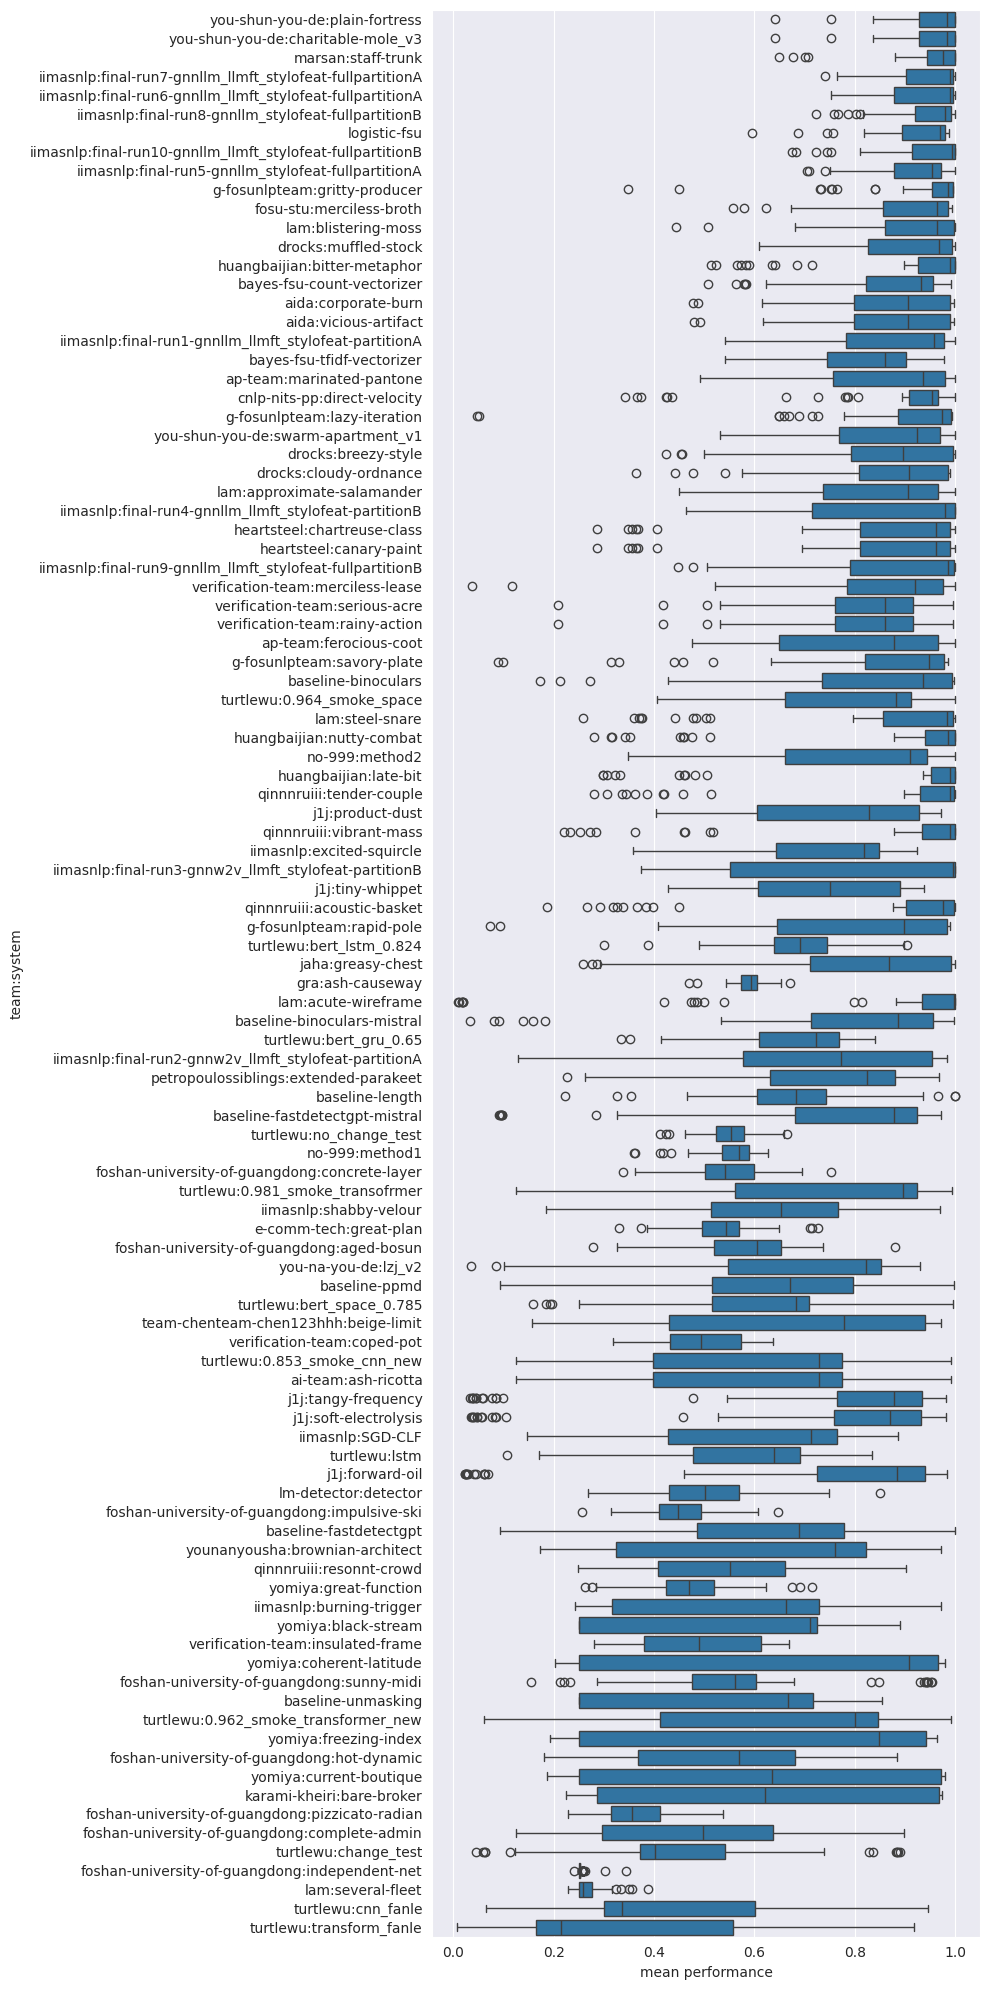

In [7]:
# sort_order = df.loc[:, :, :, 'test']['mean'].groupby('system').mean().sort_values(ascending=False).index
sort_order = df_team_mean_adjusted['mean'].groupby('system').mean().sort_values(ascending=False).index

# g = sns.FacetGrid(df.reset_index(), col='category', col_wrap=5, height=20, aspect=0.18)

# def _map_fn(data, order, **kwargs):
#     if data['dataset'].nunique() < 5:
#         return sns.scatterplot(data=data, fc='none', ec='k', **kwargs)
#     return sns.boxplot(data=data, order=order, **kwargs)

# g.map_dataframe(_map_fn, x='mean', y='system', order=sort_order)
plt.figure(figsize=(10, 20))
sns.boxplot(data=df, y='system', x='mean', order=sort_order).set(xlabel='mean performance', ylabel='team:system')
plt.tight_layout()
plt.savefig('../data/eval-figures/participants-runs.pdf')
plt.show()

### Dataset Performance

In [8]:
df_ds_mean = (1 - df).groupby('dataset').mean().sort_values('mean', ascending=False)
df_ds_mean.to_csv('../data/eval-figures/eloquent-scores.csv')
df_ds_mean

,roc-auc,brier,c@1,f1,f05u,mean
dataset,,,,,,
gpt-4-turbo-preview-german-short,0.503541,0.384141,0.569235,0.610576,0.588247,0.531118
text-bison-002-german-short,0.504059,0.375024,0.570318,0.600882,0.595506,0.529176
gemini-pro-high-temperature-unicode-half,0.430324,0.345922,0.473235,0.505549,0.519824,0.454941
vicgalle-gpt2-open-instruct-v1-short,0.366788,0.281565,0.429635,0.561106,0.584153,0.444659
alpaca-7b-short,0.351741,0.278071,0.436859,0.553412,0.589188,0.441859
...,...,...,...,...,...,...
gpt-3.5-turbo-0125,0.148794,0.120265,0.181686,0.198343,0.191265,0.168029
text-bison-002,0.151343,0.123167,0.184108,0.195333,0.181539,0.167137
meta-llama-llama-2-70b-chat-hf,0.146324,0.119147,0.176657,0.200010,0.190578,0.166588


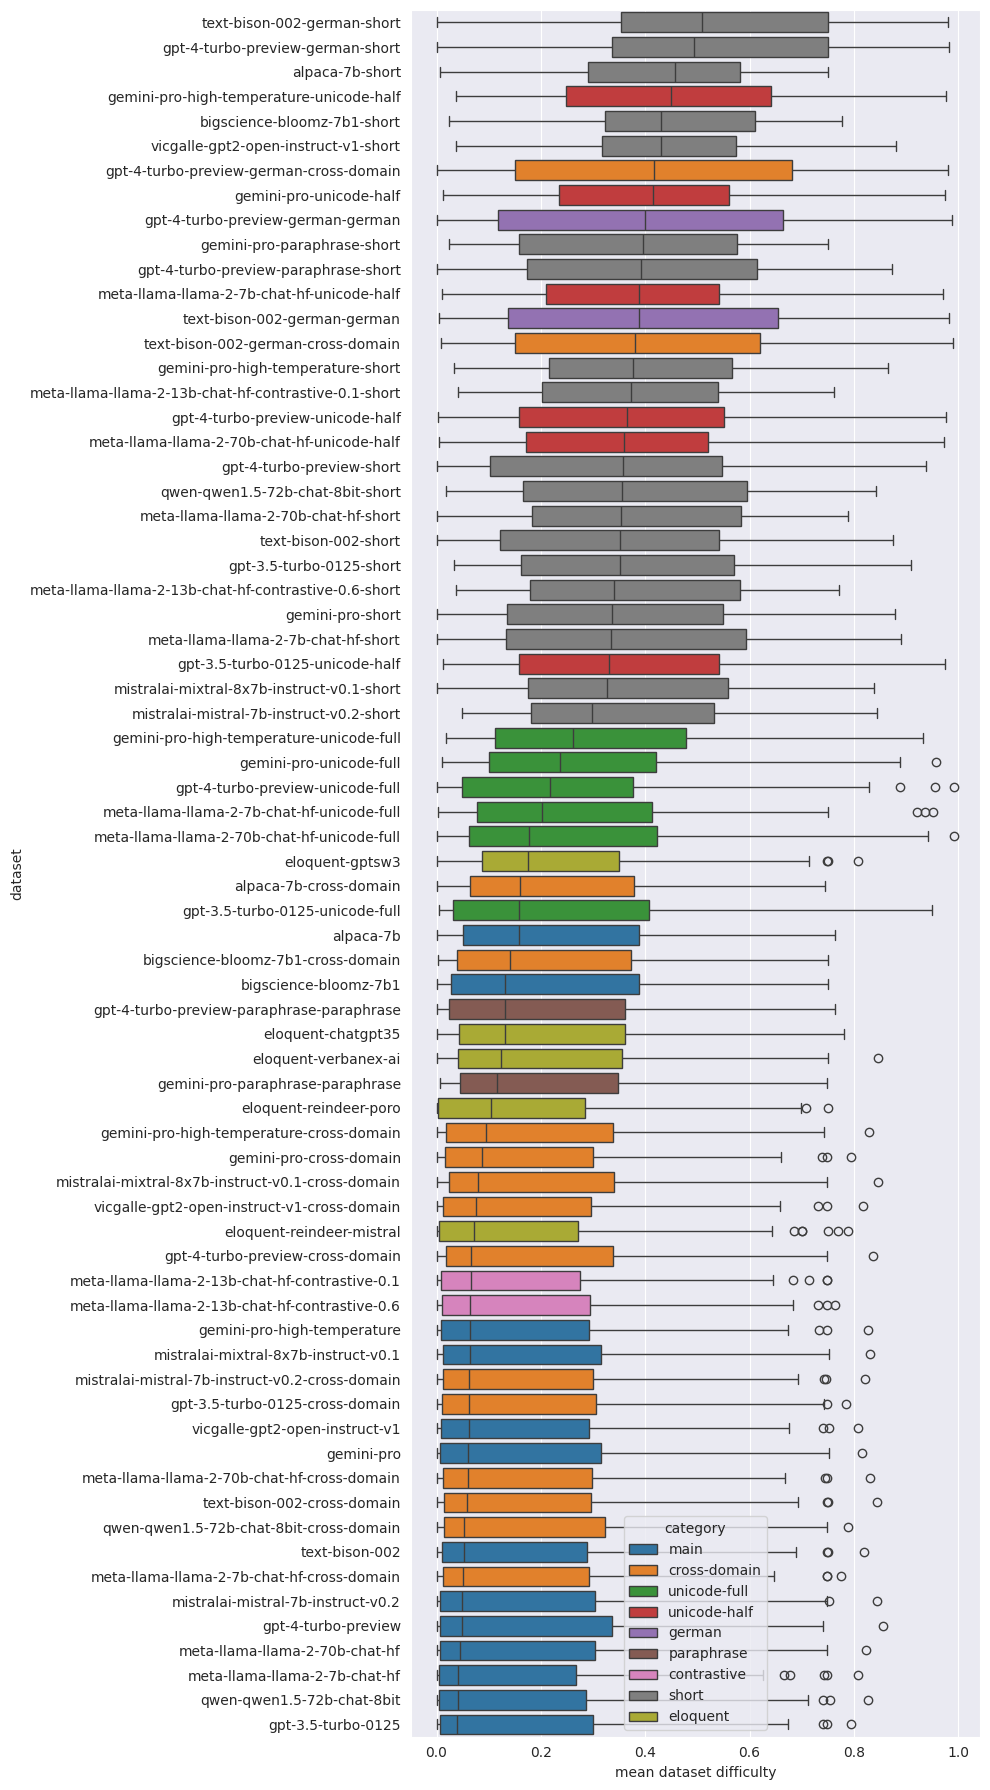

In [9]:
sort_order = df.groupby('dataset').median().sort_values('mean').index
plt.figure(figsize=(10, 18))
sns.boxplot(data=(1 - df), y='dataset', x='mean', hue='category', order=sort_order).set(xlabel='mean dataset difficulty')
plt.tight_layout()
plt.savefig('../data/eval-figures/dataset-performance.pdf')
plt.show()

### ELOQUENT Breaker Performance

In [10]:
df_eloquent_ds = 1 - df.loc[:, :, 'eloquent']
df_eloquent_mean = df_eloquent_ds.groupby('dataset').mean().sort_values('mean', ascending=False)
df_eloquent_mean.to_csv('../data/eval-figures/eloquent-scores.csv')
df_eloquent_mean

,roc-auc,brier,c@1,f1,f05u,mean
dataset,,,,,,
eloquent-gptsw3,0.215059,0.192059,0.260235,0.267343,0.250627,0.237088
eloquent-chatgpt35,0.185990,0.161049,0.228333,0.261657,0.264049,0.220216
eloquent-verbanex-ai,0.177265,0.155716,0.212794,0.256520,0.260343,0.212529
eloquent-reindeer-poro,0.154118,0.141176,0.190618,0.209147,0.199412,0.178912
eloquent-reindeer-mistral,0.151167,0.139941,0.190020,0.205461,0.196020,0.176549


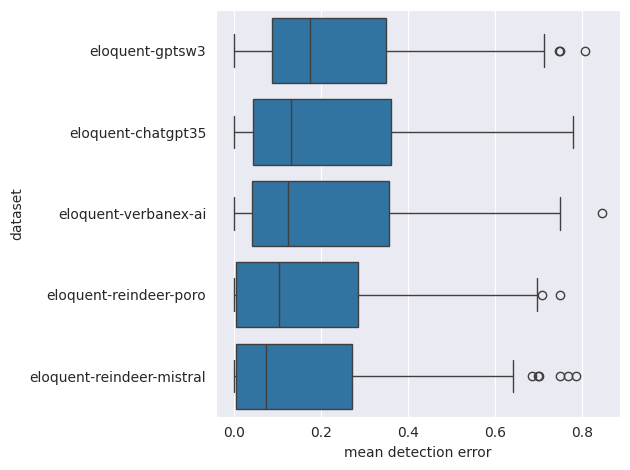

In [11]:
plt.figure()
sns.boxplot(data=df_eloquent_ds, y='dataset', x='mean', order=df_eloquent_mean.index).set(xlabel='mean detection error')
plt.tight_layout()
plt.savefig('../data/eval-figures/eloquent-scores.pdf')
plt.show()